<a href="https://colab.research.google.com/github/Mitty530/Big_data_Analytics/blob/main/PART_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install itables

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.3/199.3 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 51.7 MB/s eta 0:00:00


In [2]:
from itables import init_notebook_mode
init_notebook_mode(all_interactive=True)
from itables.sample_dfs import get_indicators
from itables import show
import itables.options as opt
opt.classes = ["display", "cell-border"]

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [4]:
loan_data_inputs_train = pd.read_csv("/content/drive/MyDrive/loan_data_inputs_train.csv", index_col = 0)
loan_data_inputs_test = pd.read_csv("/content/drive/MyDrive/loan_data_inputs_test.csv", index_col = 0)
loan_data_targets_test = pd.read_csv("/content/drive/MyDrive/loan_data_targets_test.csv", index_col = 0)
loan_data_targets_train = pd.read_csv("/content/drive/MyDrive/loan_data_targets_train.csv", index_col = 0)


In [5]:
loan_data_targets_train.head()

good_bad
427211         1
206088         1
136020         1
412305         0
36159          0

In [6]:
loan_data_inputs_train.shape

(373028, 207)

In [7]:
loan_data_targets_train.shape

(373028, 1)

In [8]:
loan_data_inputs_test.shape

(93257, 220)

In [9]:
loan_data_targets_test.shape

(93257, 1)

In [10]:
inputs_train = loan_data_inputs_train.loc[: , ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'addr_state:IA',
'addr_state:ID',
'addr_state:IL',
'addr_state:IN',
'addr_state:KS',
'addr_state:KY',
'addr_state:LA',
'addr_state:MA',
'addr_state:MD',
'addr_state:ME',
'addr_state:MI',
'addr_state:MN',
'addr_state:MO',
'home_ownership:OWN',
'home_ownership:RENT',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:educational',
'purpose:home_improvement',
'purpose:house',
'initial_list_status:f',
'initial_list_status:w',
'total_pymnt',
'total_pymnt_inv',
'total_rec_int',
'total_rec_late_fee',
'total_rec_prncp',
'total_rev_hi_lim',


]]

In [11]:
ref_categories = ['grade:G',
'addr_state:AK',
'addr_state:AL',
'addr_state:AR',
'addr_state:AZ',
'addr_state:CA',
'addr_state:CO',
'addr_state:CT',
'addr_state:DC',
'addr_state:DE',
'addr_state:FL',
'addr_state:GA',
'addr_state:HI',
'addr_state:IA',
'addr_state:ID',
'addr_state:IL',
'addr_state:IN',
'addr_state:KS',
'verification_status:Verified',
'purpose:educational','initial_list_status:f',
'mths_since_last_delinq',
'total_acc',
'total_bal_il',
'total_cu_tl',
'total_pymnt',


]

In [12]:
loan_data_targets_train.columns.sort_values().values

array(['good_bad'], dtype=object)

In [13]:
inputs_train.columns.sort_values().values

array(['addr_state:IA', 'addr_state:ID', 'addr_state:IL', 'addr_state:IN',
       'addr_state:KS', 'addr_state:KY', 'addr_state:LA', 'addr_state:MA',
       'addr_state:MD', 'addr_state:ME', 'addr_state:MI', 'addr_state:MN',
       'addr_state:MO', 'grade:A', 'grade:B', 'grade:C', 'grade:D',
       'grade:E', 'grade:F', 'grade:G', 'home_ownership:OWN',
       'home_ownership:RENT', 'initial_list_status:f',
       'initial_list_status:w', 'purpose:credit_card',
       'purpose:debt_consolidation', 'purpose:educational',
       'purpose:home_improvement', 'purpose:house', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_int', 'total_rec_late_fee',
       'total_rec_prncp', 'total_rev_hi_lim',
       'verification_status:Not Verified',
       'verification_status:Source Verified',
       'verification_status:Verified'], dtype=object)

PD Model Estimation

Logistic Regression



In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [15]:
reg = LogisticRegression()
# We create an instance of an object from the 'LogisticRegression' class.

In [16]:
pd.options.display.max_rows = None
# Sets the pandas dataframe options to display all columns/ rows.

In [17]:
import numpy as np


# Check the number of samples in each array
if len(inputs_train) != len(loan_data_targets_train):
    # If the number of samples is inconsistent, you can either:
    # 1. Trim the larger array to match the size of the smaller array
    min_samples = min(len(inputs_train), len(loan_data_targets_train))
    inputs_train = inputs_train[:min_samples]


In [18]:
reg.fit(inputs_train, loan_data_targets_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [19]:
reg.intercept_
# Displays the intercept contain in the estimated ("fitted") object from the 'LogisticRegression' class.

array([0.37469633])

In [20]:
reg.coef_
# Displays the coefficients contained in the estimated ("fitted") object from the 'LogisticRegression' class.

array([[ 8.09171717e-02,  7.95821951e-02,  9.54900752e-02,
         6.77512758e-02,  3.44359588e-02,  1.31536506e-02,
         3.36599267e-03,  3.68155583e-05,  5.14091992e-05,
         1.60590356e-02,  8.52049094e-03,  6.02627252e-03,
         5.03181383e-03,  5.66750631e-03,  3.19836574e-03,
         7.82914332e-03,  8.68995807e-05,  1.26987392e-02,
         6.30351540e-03,  5.80587146e-03,  5.32402017e-02,
         1.87682954e-01,  2.51202924e-01,  1.73647348e-01,
        -5.01539520e-02,  6.02023604e-02,  1.10594495e-01,
         1.84378997e-03,  3.88889188e-02,  9.51604675e-04,
         1.35353082e-01,  2.39343238e-01, -9.68588021e-01,
         2.29297902e-04,  9.68209543e-01,  9.26059334e-01,
         9.68754991e-01,  1.15933607e-07]])

In [21]:
feature_name = inputs_train.columns.values
# Stores the names of the columns of a dataframe in a variable.

In [22]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
# Creates a dataframe with a column titled 'Feature name' and row values contained in the 'feature_name' variable.
summary_table['Coefficients'] = np.transpose(reg.coef_)
# Creates a new column in the dataframe, called 'Coefficients',
# with row values the transposed coefficients from the 'LogisticRegression' object.
summary_table.index = summary_table.index + 1
# Increases the index of every row of the dataframe with 1.
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
# Assigns values of the row with index 0 of the dataframe.
summary_table = summary_table.sort_index()
# Sorts the dataframe by index.
summary_table

Feature name  Coefficients
0                             Intercept  3.746963e-01
1                               grade:A  8.091717e-02
2                               grade:B  7.958220e-02
3                               grade:C  9.549008e-02
4                               grade:D  6.775128e-02
5                               grade:E  3.443596e-02
6                               grade:F  1.315365e-02
7                               grade:G  3.365993e-03
8                         addr_state:IA  3.681556e-05
9                         addr_state:ID  5.140920e-05
10                        addr_state:IL  1.605904e-02
11                        addr_state:IN  8.520491e-03
12                        addr_state:KS  6.026273e-03
13                        addr_state:KY  5.031814e-03
14                        addr_state:LA  5.667506e-03
15                        addr_state:MA  3.198366e-03
16                        addr_state:MD  7.829143e-03
17                        addr_state:ME  8.689958e-05
18                        addr_state:MI  1.269874e-02
19                        addr_state:MN  6.303515e-03
20                        addr_state:MO  5.805871e-03
21                   home_ownership:OWN  5.324020e-02
22                  home_ownership:RENT  1.876830e-01
23     verification_status:Not Verified  2.512029e-01
24  verification_status:Source Verified  1.736473e-01
25         verification_status:Verified -5.015395e-02
26                  purpose:credit_card  6.020236e-02
27           purpose:debt_consolidation  1.105945e-01
28                  purpose:educational  1.843790e-03
29             purpose:home_improvement  3.888892e-02
30                        purpose:house  9.516047e-04
31                initial_list_status:f  1.353531e-01
32                initial_list_status:w  2.393432e-01
33                          total_pymnt -9.685880e-01
34                      total_pymnt_inv  2.292979e-04
35                        total_rec_int  9.682095e-01
36                   total_rec_late_fee  9.260593e-01
37                      total_rec_prncp  9.687550e-01
38                     total_rev_hi_lim  1.159336e-07

Build a Logistic Regression Model with P-Values

In [23]:
# P values for sklearn logistic regression.

# Class to display p-values for logistic regression in sklearn.

from sklearn import linear_model
import scipy.stats as stat

class LogisticRegression_with_p_values:

    def __init__(self,*args,**kwargs):#,**kwargs):
        self.model = linear_model.LogisticRegression(*args,**kwargs)#,**args)

    def fit(self,X,y):
        self.model.fit(X,y)

        #### Get p-values for the fitted model ####
        denom = (2.0 * (1.0 + np.cosh(self.model.decision_function(X))))
        denom = np.tile(denom,(X.shape[1],1)).T
        F_ij = np.dot((X / denom).T,X) ## Fisher Information Matrix
        Cramer_Rao = np.linalg.inv(F_ij) ## Inverse Information Matrix
        sigma_estimates = np.sqrt(np.diagonal(Cramer_Rao))
        z_scores = self.model.coef_[0] / sigma_estimates # z-score for eaach model coefficient
        p_values = [stat.norm.sf(abs(x)) * 2 for x in z_scores] ### two tailed test for p-values

        self.coef_ = self.model.coef_
        self.intercept_ = self.model.intercept_
        #self.z_scores = z_scores
        self.p_values = p_values
        #self.sigma_estimates = sigma_estimates
        #self.F_ij = F_ij

In [24]:
from sklearn import linear_model
import scipy.stats as stat

class LogisticRegression_with_p_values:

    def __init__(self,*args,**kwargs):
        self.model = linear_model.LogisticRegression(*args,**kwargs)

    def fit(self,X,y):
        self.model.fit(X,y)
        denom = (2.0 * (1.0 + np.cosh(self.model.decision_function(X))))
        denom = np.tile(denom,(X.shape[1],1)).T
        F_ij = np.dot((X / denom).T,X)
        Cramer_Rao = np.linalg.inv(F_ij)
        sigma_estimates = np.sqrt(np.diagonal(Cramer_Rao))
        z_scores = self.model.coef_[0] / sigma_estimates
        p_values = [stat.norm.sf(abs(x)) * 2 for x in z_scores]
        self.coef_ = self.model.coef_
        self.intercept_ = self.model.intercept_
        self.p_values = p_values

In [25]:
reg = LogisticRegression_with_p_values()
# We create an instance of an object from the newly created 'LogisticRegression_with_p_values()' class.

In [26]:
reg.fit(inputs_train, loan_data_targets_train)
# Estimates the coefficients of the object from the 'LogisticRegression' class
# with inputs (independent variables) contained in the first dataframe
# and targets (dependent variables) contained in the second dataframe.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
<ipython-input-24-7289f9dcea32>:11: RuntimeWarning: overflow encountered in cosh
  denom = (2.0 * (1.0 + np.cosh(self.model.decision_function(X))))
<ipython-input-24-7289f9dcea32>:11: RuntimeWarning: overflow encountered in mu

In [27]:
# Same as above.
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

Feature name  Coefficients
0                             Intercept  3.746963e-01
1                               grade:A  8.091717e-02
2                               grade:B  7.958220e-02
3                               grade:C  9.549008e-02
4                               grade:D  6.775128e-02
5                               grade:E  3.443596e-02
6                               grade:F  1.315365e-02
7                               grade:G  3.365993e-03
8                         addr_state:IA  3.681556e-05
9                         addr_state:ID  5.140920e-05
10                        addr_state:IL  1.605904e-02
11                        addr_state:IN  8.520491e-03
12                        addr_state:KS  6.026273e-03
13                        addr_state:KY  5.031814e-03
14                        addr_state:LA  5.667506e-03
15                        addr_state:MA  3.198366e-03
16                        addr_state:MD  7.829143e-03
17                        addr_state:ME  8.689958e-05
18                        addr_state:MI  1.269874e-02
19                        addr_state:MN  6.303515e-03
20                        addr_state:MO  5.805871e-03
21                   home_ownership:OWN  5.324020e-02
22                  home_ownership:RENT  1.876830e-01
23     verification_status:Not Verified  2.512029e-01
24  verification_status:Source Verified  1.736473e-01
25         verification_status:Verified -5.015395e-02
26                  purpose:credit_card  6.020236e-02
27           purpose:debt_consolidation  1.105945e-01
28                  purpose:educational  1.843790e-03
29             purpose:home_improvement  3.888892e-02
30                        purpose:house  9.516047e-04
31                initial_list_status:f  1.353531e-01
32                initial_list_status:w  2.393432e-01
33                          total_pymnt -9.685880e-01
34                      total_pymnt_inv  2.292979e-04
35                        total_rec_int  9.682095e-01
36                   total_rec_late_fee  9.260593e-01
37                      total_rec_prncp  9.687550e-01
38                     total_rev_hi_lim  1.159336e-07

In [28]:
# This is a list.
p_values = reg.p_values
# We take the result of the newly added method 'p_values' and store it in a variable 'p_values'.

In [29]:
# Add the intercept for completeness.
p_values = np.append(np.nan, np.array(p_values))
# We add the value 'NaN' in the beginning of the variable with p-values.

In [30]:
summary_table['p_values'] = p_values
# In the 'summary_table' dataframe, we add a new column, called 'p_values', containing the values from the 'p_values' variable.

In [31]:
summary_table

Feature name  Coefficients       p_values
0                             Intercept  3.746963e-01            NaN
1                               grade:A  8.091717e-02   9.999999e-01
2                               grade:B  7.958220e-02   9.999999e-01
3                               grade:C  9.549008e-02   9.999999e-01
4                               grade:D  6.775128e-02   9.999999e-01
5                               grade:E  3.443596e-02   1.000000e+00
6                               grade:F  1.315365e-02   1.000000e+00
7                               grade:G  3.365993e-03   1.000000e+00
8                         addr_state:IA  3.681556e-05   9.999692e-01
9                         addr_state:ID  5.140920e-05   9.999686e-01
10                        addr_state:IL  1.605904e-02   6.696297e-01
11                        addr_state:IN  8.520491e-03   8.811742e-01
12                        addr_state:KS  6.026273e-03   9.370455e-01
13                        addr_state:KY  5.031814e-03   9.420007e-01
14                        addr_state:LA  5.667506e-03   9.318539e-01
15                        addr_state:MA  3.198366e-03   9.521646e-01
16                        addr_state:MD  7.829143e-03   8.693096e-01
17                        addr_state:ME  8.689958e-05   9.999645e-01
18                        addr_state:MI  1.269874e-02   7.784042e-01
19                        addr_state:MN  6.303515e-03   9.068897e-01
20                        addr_state:MO  5.805871e-03   9.182041e-01
21                   home_ownership:OWN  5.324020e-02   3.452184e-02
22                  home_ownership:RENT  1.876830e-01   2.913361e-31
23     verification_status:Not Verified  2.512029e-01   9.999997e-01
24  verification_status:Source Verified  1.736473e-01   9.999998e-01
25         verification_status:Verified -5.015395e-02   9.999999e-01
26                  purpose:credit_card  6.020236e-02   1.417501e-02
27           purpose:debt_consolidation  1.105945e-01   6.540070e-08
28                  purpose:educational  1.843790e-03   9.925478e-01
29             purpose:home_improvement  3.888892e-02   2.517715e-01
30                        purpose:house  9.516047e-04   9.931901e-01
31                initial_list_status:f  1.353531e-01            NaN
32                initial_list_status:w  2.393432e-01            NaN
33                          total_pymnt -9.685880e-01   8.472799e-24
34                      total_pymnt_inv  2.292979e-04  9.704062e-105
35                        total_rec_int  9.682095e-01   8.815469e-24
36                   total_rec_late_fee  9.260593e-01   6.878301e-22
37                      total_rec_prncp  9.687550e-01   8.325633e-24
38                     total_rev_hi_lim  1.159336e-07   7.101399e-01

In [32]:
# We are going to remove some features, the coefficients for all or almost all of the dummy variables for which,
# are not tatistically significant.

# We do that by specifying another list of dummy variables as reference categories, and a list of variables to remove.
# Then, we are going to drop the two datasets from the original list of dummy variables.

# Variables

inputs_train = loan_data_inputs_train.loc[: , ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'addr_state:IA',
'addr_state:ID',
'addr_state:IL',
'addr_state:MO',
'home_ownership:OWN',
'home_ownership:RENT',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:educational',
'purpose:home_improvement',
'purpose:house',
'initial_list_status:f',
'initial_list_status:w',
'total_pymnt',
'total_pymnt_inv',
'total_rec_int',
'total_rec_late_fee',
'total_rec_prncp',
'total_rev_hi_lim',


]]


In [33]:
ref_categories = ['grade:G',
'addr_state:AK',
'addr_state:AL',
'addr_state:AR',
'addr_state:FL',
'addr_state:GA',
'addr_state:HI',
'addr_state:IA',
'addr_state:ID',
'verification_status:Verified',
'purpose:educational','initial_list_status:f',
'mths_since_last_delinq',
'total_acc',
'total_bal_il',
'total_cu_tl',
'total_pymnt',

]

In [34]:
# Here we run a new model.
reg2 = LogisticRegression_with_p_values()
reg2.fit(inputs_train, loan_data_targets_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
<ipython-input-24-7289f9dcea32>:11: RuntimeWarning: overflow encountered in cosh
  denom = (2.0 * (1.0 + np.cosh(self.model.decision_function(X))))
<ipython-input-24-7289f9dcea32>:11: RuntimeWarning: overflow encountered in mu

In [35]:
feature_name = inputs_train.columns.values

In [36]:
# Same as above.
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg2.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg2.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

Feature name  Coefficients
0                             Intercept      0.390637
1                               grade:A      0.084361
2                               grade:B      0.082968
3                               grade:C      0.099553
4                               grade:D      0.070632
5                               grade:E      0.035901
6                               grade:F      0.013713
7                               grade:G      0.003509
8                         addr_state:IA      0.000038
9                         addr_state:ID      0.000054
10                        addr_state:IL      0.016743
11                        addr_state:MO      0.006053
12                   home_ownership:OWN      0.055505
13                  home_ownership:RENT      0.195665
14     verification_status:Not Verified      0.261889
15  verification_status:Source Verified      0.181040
16         verification_status:Verified     -0.052292
17                  purpose:credit_card      0.062766
18           purpose:debt_consolidation      0.115300
19                  purpose:educational      0.001922
20             purpose:home_improvement      0.040544
21                        purpose:house      0.000992
22                initial_list_status:f      0.141099
23                initial_list_status:w      0.249538
24                          total_pymnt     -1.025654
25                      total_pymnt_inv     -0.000162
26                        total_rec_int      1.025647
27                   total_rec_late_fee      0.964965
28                      total_rec_prncp      1.026182
29                     total_rev_hi_lim      0.000005

In [37]:
# We add the 'p_values' here, just as we did before.
p_values = reg2.p_values
p_values = np.append(np.nan,np.array(p_values))
summary_table['p_values'] = p_values
summary_table
# Here we get the results for our final PD model.

Feature name  Coefficients      p_values
0                             Intercept      0.390637           NaN
1                               grade:A      0.084361  9.999998e-01
2                               grade:B      0.082968  9.999998e-01
3                               grade:C      0.099553  9.999998e-01
4                               grade:D      0.070632  9.999999e-01
5                               grade:E      0.035901  9.999999e-01
6                               grade:F      0.013713  1.000000e+00
7                               grade:G      0.003509  1.000000e+00
8                         addr_state:IA      0.000038  9.999765e-01
9                         addr_state:ID      0.000054  9.999694e-01
10                        addr_state:IL      0.016743  6.537614e-01
11                        addr_state:MO      0.006053  9.140607e-01
12                   home_ownership:OWN      0.055505  2.696557e-02
13                  home_ownership:RENT      0.195665  1.666583e-34
14     verification_status:Not Verified      0.261889  9.999995e-01
15  verification_status:Source Verified      0.181040  9.999997e-01
16         verification_status:Verified     -0.052292  9.999999e-01
17                  purpose:credit_card      0.062766  1.043072e-02
18           purpose:debt_consolidation      0.115300  1.686773e-08
19                  purpose:educational      0.001922  9.929633e-01
20             purpose:home_improvement      0.040544  2.300866e-01
21                        purpose:house      0.000992  9.928403e-01
22                initial_list_status:f      0.141099  9.999994e-01
23                initial_list_status:w      0.249538  9.999990e-01
24                          total_pymnt     -1.025654  9.932535e-18
25                      total_pymnt_inv     -0.000162  1.439947e-07
26                        total_rec_int      1.025647  9.942709e-18
27                   total_rec_late_fee      0.964965  7.171238e-16
28                      total_rec_prncp      1.026182  9.565324e-18
29                     total_rev_hi_lim      0.000005  1.217828e-39

In [38]:
import pickle

In [39]:
# Here we export our model to a 'SAV' file with file name 'pd_model.sav'.
pickle.dump(reg2, open('pd_model.sav', 'wb'))


# PD Model Validation (Test)

Out-of-sample validation (test)

In [40]:
inputs_test = loan_data_inputs_test.loc[: , ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'addr_state:IA',
'addr_state:ID',
'addr_state:IL',
'addr_state:MO',
'home_ownership:OWN',
'home_ownership:RENT',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:educational',
'purpose:home_improvement',
'purpose:house',
'initial_list_status:f',
'initial_list_status:w',
'total_pymnt',
'total_pymnt_inv',
'total_rec_int',
'total_rec_late_fee',
'total_rec_prncp',
'total_rev_hi_lim',

]]

In [41]:
ref_categories = ['grade:G',
'addr_state:AK',
'addr_state:AL',
'addr_state:AR',
'addr_state:FL',
'addr_state:GA',
'addr_state:HI',
'addr_state:IA',
'addr_state:ID',
'verification_status:Verified',
'purpose:educational','initial_list_status:f',
'mths_since_last_delinq',
'total_acc',
'total_bal_il',
'total_cu_tl',
'total_pymnt',
]

In [42]:
# Calculates the predicted values for the dependent variable (targets)
# based on the values of the independent variables (inputs) supplied as an argument.
y_hat_test = reg2.model.predict(inputs_test)

In [43]:
# This is an array of predicted discrete classess (in this case, 0s and 1s).
y_hat_test

array([1, 1, 1, ..., 0, 1, 1])

In [44]:
# Calculates the predicted probability values for the dependent variable (targets)
# based on the values of the independent variables (inputs) supplied as an argument.
y_hat_test_proba = reg2.model.predict_proba(inputs_test)

In [45]:
# This is an array of arrays of predicted class probabilities for all classes.
# In this case, the first value of every sub-array is the probability for the observation to belong to the first class, i.e. 0,
# and the second value is the probability for the observation to belong to the first class, i.e. 1.
y_hat_test_proba


array([[8.45609377e-06, 9.99991544e-01],
       [2.66670131e-01, 7.33329869e-01],
       [1.09114563e-05, 9.99989089e-01],
       ...,
       [1.00000000e+00, 0.00000000e+00],
       [9.22823449e-04, 9.99077177e-01],
       [9.43250239e-04, 9.99056750e-01]])

In [46]:
# Here we take all the arrays in the array, and from each array, we take all rows, and only the element with index 1,
# that is, the second element.
# In other words, we take only the probabilities for being 1.
y_hat_test_proba[:][:,1]

array([0.99999154, 0.73332987, 0.99998909, ..., 0.        , 0.99907718,
       0.99905675])

In [47]:
# We store these probabilities in a variable.
y_hat_test_proba = y_hat_test_proba[: ][: , 1]


In [48]:
# This variable contains an array of probabilities of being 1.
y_hat_test_proba

array([0.99999154, 0.73332987, 0.99998909, ..., 0.        , 0.99907718,
       0.99905675])

In [49]:
loan_data_targets_test_temp = loan_data_targets_test

In [50]:
# We reset the index of a dataframe.
loan_data_targets_test_temp.reset_index(drop = True, inplace = True)


In [51]:
# Concatenates two dataframes.
df_actual_predicted_probs = pd.concat([loan_data_targets_test_temp, pd.DataFrame(y_hat_test_proba)], axis = 1)


In [52]:
df_actual_predicted_probs.shape

(93257, 2)

In [53]:
df_actual_predicted_probs.columns = ['loan_data_targets_test', 'y_hat_test_proba']

In [54]:
# Makes the index of one dataframe equal to the index of another dataframe.
df_actual_predicted_probs.index = loan_data_inputs_test.index


In [55]:
df_actual_predicted_probs.head()

loan_data_targets_test  y_hat_test_proba
362514                       1          0.999992
288564                       1          0.733330
213591                       1          0.999989
263083                       1          0.840736
165001                       1          0.997413

Accuracy and Area under the Curve

In [56]:
# We create a new column with an indicator,
# where every observation that has predicted probability greater than the threshold has a value of 1,
# and every observation that has predicted probability lower than the threshold has a value of 0.
tr = 0.9
df_actual_predicted_probs['y_hat_test'] = np.where(df_actual_predicted_probs['y_hat_test_proba'] > tr, 1, 0)

In [57]:
# Creates a cross-table where the actual values are displayed by rows and the predicted values by columns.
# This table is known as a Confusion Matrix.
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted'])


Predicted      0      1
Actual                 
0           8586   1604
1          19727  63340

In [58]:
# Here we divide each value of the table by the total number of observations,
# thus getting percentages, or, rates.
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]


Predicted         0         1
Actual                       
0          0.092068  0.017200
1          0.211534  0.679198

In [59]:
# Here we calculate Accuracy of the model, which is the sum of the diagonal rates.
(pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[0, 0] + (pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[1, 1]


0.771266500101869

In [60]:
# Returns the Receiver Operating Characteristic (ROC) Curve from a set of actual values and their predicted probabilities.
# As a result, we get three arrays: the false positive rates, the true positive rates, and the thresholds.
from sklearn.metrics import roc_curve, roc_auc_score
roc_curve(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])


(array([0.        , 0.        , 0.        , ..., 0.54131501, 0.69293425,
        1.        ]),
 array([0.00000000e+00, 1.20384750e-05, 2.27888331e-02, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00]),
 array([2.00000000e+000, 1.00000000e+000, 9.99983846e-001, ...,
        4.78036108e-007, 5.93339538e-309, 0.00000000e+000]))

In [61]:
# Here we store each of the three arrays in a separate variable.
fpr, tpr, thresholds = roc_curve(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])


In [62]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Text(0.5, 1.0, 'ROC curve')

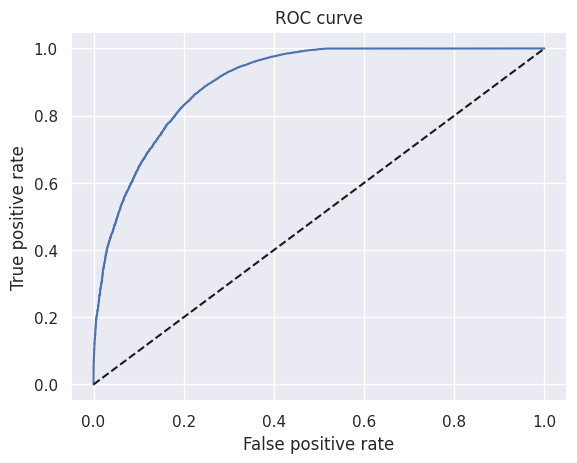

In [63]:
plt.plot(fpr, tpr)
# We plot the false positive rate along the x-axis and the true positive rate along the y-axis,
# thus plotting the ROC curve.
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
# We plot a seconary diagonal line, with dashed line style and black color.
plt.xlabel('False positive rate')
# We name the x-axis "False positive rate".
plt.ylabel('True positive rate')
# We name the x-axis "True positive rate".
plt.title('ROC curve')
# We name the graph "ROC curve".

In [64]:
# Calculates the Area Under the Receiver Operating Characteristic Curve (AUROC)
# from a set of actual values and their predicted probabilities.
AUROC = roc_auc_score(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])
AUROC

0.9032633281246549

Gini and Kolmogorov-**Smirnov**

In [65]:
# Sorts a dataframe by the values of a specific column.
df_actual_predicted_probs = df_actual_predicted_probs.sort_values('y_hat_test_proba')


In [66]:
df_actual_predicted_probs.head()

loan_data_targets_test  y_hat_test_proba  y_hat_test
185097                       0               0.0           0
441690                       0               0.0           0
421781                       0               0.0           0
177397                       0               0.0           0
3099                         0               0.0           0

In [67]:
df_actual_predicted_probs.tail()

loan_data_targets_test  y_hat_test_proba  y_hat_test
47461                        1               1.0           1
69541                        1               1.0           1
168084                       1               1.0           1
176999                       1               1.0           1
178261                       1               1.0           1

In [68]:
# We reset the index of a dataframe and overwrite it.
df_actual_predicted_probs = df_actual_predicted_probs.reset_index()

In [69]:
df_actual_predicted_probs.head()

index  loan_data_targets_test  y_hat_test_proba  y_hat_test
0  185097                       0               0.0           0
1  441690                       0               0.0           0
2  421781                       0               0.0           0
3  177397                       0               0.0           0
4    3099                       0               0.0           0

In [70]:
df_actual_predicted_probs['Cumulative N Population'] = df_actual_predicted_probs.index + 1
# We calculate the cumulative number of all observations.
# We use the new index for that. Since indexing in ython starts from 0, we add 1 to each index.
df_actual_predicted_probs['Cumulative N Good'] = df_actual_predicted_probs['loan_data_targets_test'].cumsum()
# We calculate cumulative number of 'good', which is the cumulative sum of the column with actual observations.
df_actual_predicted_probs['Cumulative N Bad'] = df_actual_predicted_probs['Cumulative N Population'] - df_actual_predicted_probs['loan_data_targets_test'].cumsum()
# We calculate cumulative number of 'bad', which is
# the difference between the cumulative number of all observations and cumulative number of 'good' for each row.

In [71]:
df_actual_predicted_probs.head()

index  loan_data_targets_test  y_hat_test_proba  y_hat_test  \
0  185097                       0               0.0           0   
1  441690                       0               0.0           0   
2  421781                       0               0.0           0   
3  177397                       0               0.0           0   
4    3099                       0               0.0           0   

   Cumulative N Population  Cumulative N Good  Cumulative N Bad  
0                        1                  0                 1  
1                        2                  0                 2  
2                        3                  0                 3  
3                        4                  0                 4  
4                        5                  0                 5

In [72]:
df_actual_predicted_probs['Cumulative Perc Population'] = df_actual_predicted_probs['Cumulative N Population'] / (df_actual_predicted_probs.shape[0])
# We calculate the cumulative percentage of all observations.
df_actual_predicted_probs['Cumulative Perc Good'] = df_actual_predicted_probs['Cumulative N Good'] / df_actual_predicted_probs['loan_data_targets_test'].sum()
# We calculate cumulative percentage of 'good'.
df_actual_predicted_probs['Cumulative Perc Bad'] = df_actual_predicted_probs['Cumulative N Bad'] / (df_actual_predicted_probs.shape[0] - df_actual_predicted_probs['loan_data_targets_test'].sum())
# We calculate the cumulative percentage of 'bad'.

In [73]:
df_actual_predicted_probs.head()

index  loan_data_targets_test  y_hat_test_proba  y_hat_test  \
0  185097                       0               0.0           0   
1  441690                       0               0.0           0   
2  421781                       0               0.0           0   
3  177397                       0               0.0           0   
4    3099                       0               0.0           0   

   Cumulative N Population  Cumulative N Good  Cumulative N Bad  \
0                        1                  0                 1   
1                        2                  0                 2   
2                        3                  0                 3   
3                        4                  0                 4   
4                        5                  0                 5   

   Cumulative Perc Population  Cumulative Perc Good  Cumulative Perc Bad  
0                    0.000011                   0.0             0.000098  
1                    0.000021                   0.0             0.000196  
2                    0.000032                   0.0             0.000294  
3                    0.000043                   0.0             0.000393  
4                    0.000054                   0.0             0.000491

In [74]:
df_actual_predicted_probs.tail()

index  loan_data_targets_test  y_hat_test_proba  y_hat_test  \
93252   47461                       1               1.0           1   
93253   69541                       1               1.0           1   
93254  168084                       1               1.0           1   
93255  176999                       1               1.0           1   
93256  178261                       1               1.0           1   

       Cumulative N Population  Cumulative N Good  Cumulative N Bad  \
93252                    93253              83063             10190   
93253                    93254              83064             10190   
93254                    93255              83065             10190   
93255                    93256              83066             10190   
93256                    93257              83067             10190   

       Cumulative Perc Population  Cumulative Perc Good  Cumulative Perc Bad  
93252                    0.999957              0.999952                  1.0  
93253                    0.999968              0.999964                  1.0  
93254                    0.999979              0.999976                  1.0  
93255                    0.999989              0.999988                  1.0  
93256                    1.000000              1.000000                  1.0

Text(0.5, 1.0, 'Gini')

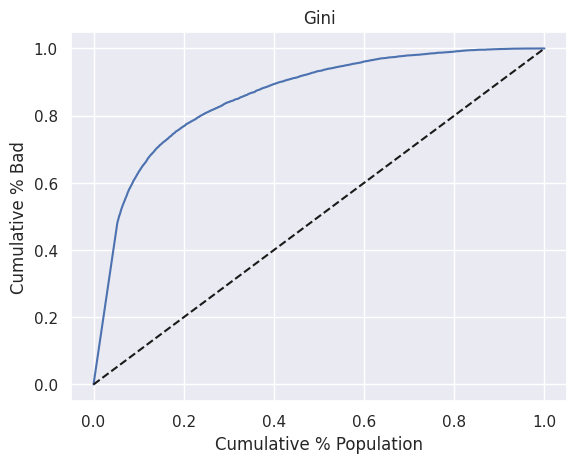

In [75]:
# Plot Gini
plt.plot(df_actual_predicted_probs['Cumulative Perc Population'], df_actual_predicted_probs['Cumulative Perc Bad'])
# We plot the cumulative percentage of all along the x-axis and the cumulative percentage 'good' along the y-axis,
# thus plotting the Gini curve.
plt.plot(df_actual_predicted_probs['Cumulative Perc Population'], df_actual_predicted_probs['Cumulative Perc Population'], linestyle = '--', color = 'k')
# We plot a seconary diagonal line, with dashed line style and black color.
plt.xlabel('Cumulative % Population')
# We name the x-axis "Cumulative % Population".
plt.ylabel('Cumulative % Bad')
# We name the y-axis "Cumulative % Bad".
plt.title('Gini')
# We name the graph "Gini".

In [76]:
# Here we calculate Gini from AUROC.

Gini = AUROC * 2 - 1
Gini

0.8065266562493099

Text(0.5, 1.0, 'Kolmogorov-Smirnov')

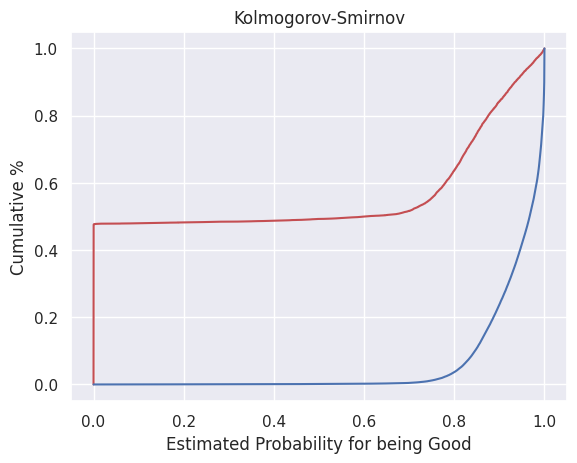

In [77]:
# Plot KS
plt.plot(df_actual_predicted_probs['y_hat_test_proba'], df_actual_predicted_probs['Cumulative Perc Bad'], color = 'r')
# We plot the predicted (estimated) probabilities along the x-axis and the cumulative percentage 'bad' along the y-axis,
# colored in red.
plt.plot(df_actual_predicted_probs['y_hat_test_proba'], df_actual_predicted_probs['Cumulative Perc Good'], color = 'b')
# We plot the predicted (estimated) probabilities along the x-axis and the cumulative percentage 'good' along the y-axis,
# colored in red.
plt.xlabel('Estimated Probability for being Good')
# We name the x-axis "Estimated Probability for being Good".
plt.ylabel('Cumulative %')
# We name the y-axis "Cumulative %".
plt.title('Kolmogorov-Smirnov')
# We name the graph "Kolmogorov-Smirnov".

In [78]:
KS = max(df_actual_predicted_probs['Cumulative Perc Bad'] - df_actual_predicted_probs['Cumulative Perc Good'])
# We calculate KS from the data. It is the maximum of the difference between the cumulative percentage of 'bad'
# and the cumulative percentage of 'good'.
KS

0.6403155873807626

# Applying the PD Model

Calculating PD of individual *accounts*

In [79]:
pd.options.display.max_columns = None
# Sets the pandas dataframe options to display all columns/ rows.

In [80]:
inputs_test.head()

grade:A  grade:B  grade:C  grade:D  grade:E  grade:F  grade:G  \
362514        0        0        1        0        0        0        0   
288564        0        0        0        0        1        0        0   
213591        0        0        1        0        0        0        0   
263083        0        0        1        0        0        0        0   
165001        1        0        0        0        0        0        0   

        addr_state:IA  addr_state:ID  addr_state:IL  addr_state:MO  \
362514              0              0              0              0   
288564              0              0              0              0   
213591              0              0              0              0   
263083              0              0              0              0   
165001              0              0              0              0   

        home_ownership:OWN  home_ownership:RENT  \
362514                   0                    0   
288564                   0                    0   
213591                   0                    0   
263083                   0                    0   
165001                   0                    0   

        verification_status:Not Verified  verification_status:Source Verified  \
362514                                 0                                    0   
288564                                 0                                    0   
213591                                 0                                    0   
263083                                 0                                    1   
165001                                 0                                    0   

        verification_status:Verified  purpose:credit_card  \
362514                             1                    0   
288564                             1                    1   
213591                             1                    0   
263083                             0                    0   
165001                             1                    0   

        purpose:debt_consolidation  purpose:educational  \
362514                           0                    0   
288564                           0                    0   
213591                           1                    0   
263083                           1                    0   
165001                           1                    0   

        purpose:home_improvement  purpose:house  initial_list_status:f  \
362514                         1              0                      1   
288564                         0              0                      0   
213591                         0              0                      1   
263083                         0              0                      0   
165001                         0              0                      1   

        initial_list_status:w  total_pymnt  total_pymnt_inv  total_rec_int  \
362514                      0  38213.56000         38213.56        5713.56   
288564                      1   4450.12000          4450.12        2664.79   
213591                      0  32388.64000         32388.64        2388.64   
263083                      1   4719.18000          4719.18        2220.94   
165001                      0  16628.33315         16517.47        1628.33   

        total_rec_late_fee  total_rec_prncp  total_rev_hi_lim  
362514                 0.0         32500.00           25100.0  
288564                 0.0          1785.33           24000.0  
213591                 0.0         30000.00           30000.0  
263083                 0.0          2498.24           17400.0  
165001                 0.0         15000.00            8700.0

In [81]:
summary_table

Feature name  Coefficients      p_values
0                             Intercept      0.390637           NaN
1                               grade:A      0.084361  9.999998e-01
2                               grade:B      0.082968  9.999998e-01
3                               grade:C      0.099553  9.999998e-01
4                               grade:D      0.070632  9.999999e-01
5                               grade:E      0.035901  9.999999e-01
6                               grade:F      0.013713  1.000000e+00
7                               grade:G      0.003509  1.000000e+00
8                         addr_state:IA      0.000038  9.999765e-01
9                         addr_state:ID      0.000054  9.999694e-01
10                        addr_state:IL      0.016743  6.537614e-01
11                        addr_state:MO      0.006053  9.140607e-01
12                   home_ownership:OWN      0.055505  2.696557e-02
13                  home_ownership:RENT      0.195665  1.666583e-34
14     verification_status:Not Verified      0.261889  9.999995e-01
15  verification_status:Source Verified      0.181040  9.999997e-01
16         verification_status:Verified     -0.052292  9.999999e-01
17                  purpose:credit_card      0.062766  1.043072e-02
18           purpose:debt_consolidation      0.115300  1.686773e-08
19                  purpose:educational      0.001922  9.929633e-01
20             purpose:home_improvement      0.040544  2.300866e-01
21                        purpose:house      0.000992  9.928403e-01
22                initial_list_status:f      0.141099  9.999994e-01
23                initial_list_status:w      0.249538  9.999990e-01
24                          total_pymnt     -1.025654  9.932535e-18
25                      total_pymnt_inv     -0.000162  1.439947e-07
26                        total_rec_int      1.025647  9.942709e-18
27                   total_rec_late_fee      0.964965  7.171238e-16
28                      total_rec_prncp      1.026182  9.565324e-18
29                     total_rev_hi_lim      0.000005  1.217828e-39

In [82]:
y_hat_test_proba

array([0.99999154, 0.73332987, 0.99998909, ..., 0.        , 0.99907718,
       0.99905675])

# Creating a Scorecard

In [83]:
ref_categories

['grade:G',
 'addr_state:AK',
 'addr_state:AL',
 'addr_state:AR',
 'addr_state:FL',
 'addr_state:GA',
 'addr_state:HI',
 'addr_state:IA',
 'addr_state:ID',
 'verification_status:Verified',
 'purpose:educational',
 'initial_list_status:f',
 'mths_since_last_delinq',
 'total_acc',
 'total_bal_il',
 'total_cu_tl',
 'total_pymnt']

In [84]:
df_ref_categories = pd.DataFrame(ref_categories, columns = ['Feature name'])
# We create a new dataframe with one column. Its values are the values from the 'reference_categories' list.
# We name it 'Feature name'.
df_ref_categories['Coefficients'] = 0
# We create a second column, called 'Coefficients', which contains only 0 values.
df_ref_categories['p_values'] = np.nan
# We create a third column, called 'p_values', with contains only NaN values.
df_ref_categories

Feature name  Coefficients  p_values
0                        grade:G             0       NaN
1                  addr_state:AK             0       NaN
2                  addr_state:AL             0       NaN
3                  addr_state:AR             0       NaN
4                  addr_state:FL             0       NaN
5                  addr_state:GA             0       NaN
6                  addr_state:HI             0       NaN
7                  addr_state:IA             0       NaN
8                  addr_state:ID             0       NaN
9   verification_status:Verified             0       NaN
10           purpose:educational             0       NaN
11         initial_list_status:f             0       NaN
12        mths_since_last_delinq             0       NaN
13                     total_acc             0       NaN
14                  total_bal_il             0       NaN
15                   total_cu_tl             0       NaN
16                   total_pymnt             0       NaN

In [85]:
df_scorecard = pd.concat([summary_table, df_ref_categories])
# Concatenates two dataframes.
df_scorecard = df_scorecard.reset_index()
# We reset the index of a dataframe.
df_scorecard

index                         Feature name  Coefficients      p_values
0       0                            Intercept      0.390637           NaN
1       1                              grade:A      0.084361  9.999998e-01
2       2                              grade:B      0.082968  9.999998e-01
3       3                              grade:C      0.099553  9.999998e-01
4       4                              grade:D      0.070632  9.999999e-01
5       5                              grade:E      0.035901  9.999999e-01
6       6                              grade:F      0.013713  1.000000e+00
7       7                              grade:G      0.003509  1.000000e+00
8       8                        addr_state:IA      0.000038  9.999765e-01
9       9                        addr_state:ID      0.000054  9.999694e-01
10     10                        addr_state:IL      0.016743  6.537614e-01
11     11                        addr_state:MO      0.006053  9.140607e-01
12     12                   home_ownership:OWN      0.055505  2.696557e-02
13     13                  home_ownership:RENT      0.195665  1.666583e-34
14     14     verification_status:Not Verified      0.261889  9.999995e-01
15     15  verification_status:Source Verified      0.181040  9.999997e-01
16     16         verification_status:Verified     -0.052292  9.999999e-01
17     17                  purpose:credit_card      0.062766  1.043072e-02
18     18           purpose:debt_consolidation      0.115300  1.686773e-08
19     19                  purpose:educational      0.001922  9.929633e-01
20     20             purpose:home_improvement      0.040544  2.300866e-01
21     21                        purpose:house      0.000992  9.928403e-01
22     22                initial_list_status:f      0.141099  9.999994e-01
23     23                initial_list_status:w      0.249538  9.999990e-01
24     24                          total_pymnt     -1.025654  9.932535e-18
25     25                      total_pymnt_inv     -0.000162  1.439947e-07
26     26                        total_rec_int      1.025647  9.942709e-18
27     27                   total_rec_late_fee      0.964965  7.171238e-16
28     28                      total_rec_prncp      1.026182  9.565324e-18
29     29                     total_rev_hi_lim      0.000005  1.217828e-39
30      0                              grade:G      0.000000           NaN
31      1                        addr_state:AK      0.000000           NaN
32      2                        addr_state:AL      0.000000           NaN
33      3                        addr_state:AR      0.000000           NaN
34      4                        addr_state:FL      0.000000           NaN
35      5                        addr_state:GA      0.000000           NaN
36      6                        addr_state:HI      0.000000           NaN
37      7                        addr_state:IA      0.000000           NaN
38      8                        addr_state:ID      0.000000           NaN
39      9         verification_status:Verified      0.000000           NaN
40     10                  purpose:educational      0.000000           NaN
41     11                initial_list_status:f      0.000000           NaN
42     12               mths_since_last_delinq      0.000000           NaN
43     13                            total_acc      0.000000           NaN
44     14                         total_bal_il      0.000000           NaN
45     15                          total_cu_tl      0.000000           NaN
46     16                          total_pymnt      0.000000           NaN

In [86]:
df_scorecard['Original feature name'] = df_scorecard['Feature name'].str.split(':').str[0]
# We create a new column, called 'Original feature name', which contains the value of the 'Feature name' column,
# up to the column symbol.
df_scorecard

index                         Feature name  Coefficients      p_values  \
0       0                            Intercept      0.390637           NaN   
1       1                              grade:A      0.084361  9.999998e-01   
2       2                              grade:B      0.082968  9.999998e-01   
3       3                              grade:C      0.099553  9.999998e-01   
4       4                              grade:D      0.070632  9.999999e-01   
5       5                              grade:E      0.035901  9.999999e-01   
6       6                              grade:F      0.013713  1.000000e+00   
7       7                              grade:G      0.003509  1.000000e+00   
8       8                        addr_state:IA      0.000038  9.999765e-01   
9       9                        addr_state:ID      0.000054  9.999694e-01   
10     10                        addr_state:IL      0.016743  6.537614e-01   
11     11                        addr_state:MO      0.006053  9.140607e-01   
12     12                   home_ownership:OWN      0.055505  2.696557e-02   
13     13                  home_ownership:RENT      0.195665  1.666583e-34   
14     14     verification_status:Not Verified      0.261889  9.999995e-01   
15     15  verification_status:Source Verified      0.181040  9.999997e-01   
16     16         verification_status:Verified     -0.052292  9.999999e-01   
17     17                  purpose:credit_card      0.062766  1.043072e-02   
18     18           purpose:debt_consolidation      0.115300  1.686773e-08   
19     19                  purpose:educational      0.001922  9.929633e-01   
20     20             purpose:home_improvement      0.040544  2.300866e-01   
21     21                        purpose:house      0.000992  9.928403e-01   
22     22                initial_list_status:f      0.141099  9.999994e-01   
23     23                initial_list_status:w      0.249538  9.999990e-01   
24     24                          total_pymnt     -1.025654  9.932535e-18   
25     25                      total_pymnt_inv     -0.000162  1.439947e-07   
26     26                        total_rec_int      1.025647  9.942709e-18   
27     27                   total_rec_late_fee      0.964965  7.171238e-16   
28     28                      total_rec_prncp      1.026182  9.565324e-18   
29     29                     total_rev_hi_lim      0.000005  1.217828e-39   
30      0                              grade:G      0.000000           NaN   
31      1                        addr_state:AK      0.000000           NaN   
32      2                        addr_state:AL      0.000000           NaN   
33      3                        addr_state:AR      0.000000           NaN   
34      4                        addr_state:FL      0.000000           NaN   
35      5                        addr_state:GA      0.000000           NaN   
36      6                        addr_state:HI      0.000000           NaN   
37      7                        addr_state:IA      0.000000           NaN   
38      8                        addr_state:ID      0.000000           NaN   
39      9         verification_status:Verified      0.000000           NaN   
40     10                  purpose:educational      0.000000           NaN   
41     11                initial_list_status:f      0.000000           NaN   
42     12               mths_since_last_delinq      0.000000           NaN   
43     13                            total_acc      0.000000           NaN   
44     14                         total_bal_il      0.000000           NaN   
45     15                          total_cu_tl      0.000000           NaN   
46     16                          total_pymnt      0.000000           NaN   

     Original feature name  
0                Intercept  
1                    grade  
2                    grade  
3                    grade  
4                    grade  
5                    grade  
6                    grade  
7                    grade 

In [87]:
min_score = 300
max_score = 850

In [88]:
# Groups the data by the values of the 'Original feature name' column.
# Aggregates the data in the 'Coefficients' column, calculating their minimum.
df_scorecard.groupby('Original feature name')['Coefficients'].min()


Original feature name
Intercept                 0.390637
addr_state                0.000000
grade                     0.000000
home_ownership            0.055505
initial_list_status       0.000000
mths_since_last_delinq    0.000000
purpose                   0.000000
total_acc                 0.000000
total_bal_il              0.000000
total_cu_tl               0.000000
total_pymnt              -1.025654
total_pymnt_inv          -0.000162
total_rec_int             1.025647
total_rec_late_fee        0.964965
total_rec_prncp           1.026182
total_rev_hi_lim          0.000005
verification_status      -0.052292
Name: Coefficients, dtype: float64

In [89]:
min_sum_coef = df_scorecard.groupby('Original feature name')['Coefficients'].min().sum()
# Up to the 'min()' method everything is the same as in te line above.
# Then, we aggregate further and sum all the minimum values.
min_sum_coef

2.3848332792221916

In [90]:
# Groups the data by the values of the 'Original feature name' column.
# Aggregates the data in the 'Coefficients' column, calculating their maximum.
df_scorecard.groupby('Original feature name')['Coefficients'].max()


Original feature name
Intercept                 0.390637
addr_state                0.016743
grade                     0.099553
home_ownership            0.195665
initial_list_status       0.249538
mths_since_last_delinq    0.000000
purpose                   0.115300
total_acc                 0.000000
total_bal_il              0.000000
total_cu_tl               0.000000
total_pymnt               0.000000
total_pymnt_inv          -0.000162
total_rec_int             1.025647
total_rec_late_fee        0.964965
total_rec_prncp           1.026182
total_rev_hi_lim          0.000005
verification_status       0.261889
Name: Coefficients, dtype: float64

In [91]:
max_sum_coef = df_scorecard.groupby('Original feature name')['Coefficients'].max().sum()
# Up to the 'min()' method everything is the same as in te line above.
# Then, we aggregate further and sum all the maximum values.
max_sum_coef

4.345962057955703

In [92]:
df_scorecard['Score - Calculation'] = df_scorecard['Coefficients'] * (max_score - min_score) / (max_sum_coef - min_sum_coef)
# We multiply the value of the 'Coefficients' column by the ration of the differences between
# maximum score and minimum score and maximum sum of coefficients and minimum sum of cefficients.
df_scorecard

index                         Feature name  Coefficients      p_values  \
0       0                            Intercept      0.390637           NaN   
1       1                              grade:A      0.084361  9.999998e-01   
2       2                              grade:B      0.082968  9.999998e-01   
3       3                              grade:C      0.099553  9.999998e-01   
4       4                              grade:D      0.070632  9.999999e-01   
5       5                              grade:E      0.035901  9.999999e-01   
6       6                              grade:F      0.013713  1.000000e+00   
7       7                              grade:G      0.003509  1.000000e+00   
8       8                        addr_state:IA      0.000038  9.999765e-01   
9       9                        addr_state:ID      0.000054  9.999694e-01   
10     10                        addr_state:IL      0.016743  6.537614e-01   
11     11                        addr_state:MO      0.006053  9.140607e-01   
12     12                   home_ownership:OWN      0.055505  2.696557e-02   
13     13                  home_ownership:RENT      0.195665  1.666583e-34   
14     14     verification_status:Not Verified      0.261889  9.999995e-01   
15     15  verification_status:Source Verified      0.181040  9.999997e-01   
16     16         verification_status:Verified     -0.052292  9.999999e-01   
17     17                  purpose:credit_card      0.062766  1.043072e-02   
18     18           purpose:debt_consolidation      0.115300  1.686773e-08   
19     19                  purpose:educational      0.001922  9.929633e-01   
20     20             purpose:home_improvement      0.040544  2.300866e-01   
21     21                        purpose:house      0.000992  9.928403e-01   
22     22                initial_list_status:f      0.141099  9.999994e-01   
23     23                initial_list_status:w      0.249538  9.999990e-01   
24     24                          total_pymnt     -1.025654  9.932535e-18   
25     25                      total_pymnt_inv     -0.000162  1.439947e-07   
26     26                        total_rec_int      1.025647  9.942709e-18   
27     27                   total_rec_late_fee      0.964965  7.171238e-16   
28     28                      total_rec_prncp      1.026182  9.565324e-18   
29     29                     total_rev_hi_lim      0.000005  1.217828e-39   
30      0                              grade:G      0.000000           NaN   
31      1                        addr_state:AK      0.000000           NaN   
32      2                        addr_state:AL      0.000000           NaN   
33      3                        addr_state:AR      0.000000           NaN   
34      4                        addr_state:FL      0.000000           NaN   
35      5                        addr_state:GA      0.000000           NaN   
36      6                        addr_state:HI      0.000000           NaN   
37      7                        addr_state:IA      0.000000           NaN   
38      8                        addr_state:ID      0.000000           NaN   
39      9         verification_status:Verified      0.000000           NaN   
40     10                  purpose:educational      0.000000           NaN   
41     11                initial_list_status:f      0.000000           NaN   
42     12               mths_since_last_delinq      0.000000           NaN   
43     13                            total_acc      0.000000           NaN   
44     14                         total_bal_il      0.000000           NaN   
45     15                          total_cu_tl      0.000000           NaN   
46     16                          total_pymnt      0.000000           NaN   

     Original feature name  Score - Calculation  
0                Intercept           109.554336  
1                    grade            23.659160  
2                    grade            23.268306  
3                    grade            27.919721  
4        

In [93]:
df_scorecard['Score - Calculation'][0] = ((df_scorecard['Coefficients'][0] - min_sum_coef) / (max_sum_coef - min_sum_coef)) * (max_score - min_score) + min_score
# We divide the difference of the value of the 'Coefficients' column and the minimum sum of coefficients by
# the difference of the maximum sum of coefficients and the minimum sum of coefficients.
# Then, we multiply that by the difference between the maximum score and the minimum score.
# Then, we add minimum score.
df_scorecard

<ipython-input-93-ddbf2e7e516f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_scorecard['Score - Calculation'][0] = ((df_scorecard['Coefficients'][0] - min_sum_coef) / (max_sum_coef - min_sum_coef)) * (max_score - min_score) + min_score


index                         Feature name  Coefficients      p_values  \
0       0                            Intercept      0.390637           NaN   
1       1                              grade:A      0.084361  9.999998e-01   
2       2                              grade:B      0.082968  9.999998e-01   
3       3                              grade:C      0.099553  9.999998e-01   
4       4                              grade:D      0.070632  9.999999e-01   
5       5                              grade:E      0.035901  9.999999e-01   
6       6                              grade:F      0.013713  1.000000e+00   
7       7                              grade:G      0.003509  1.000000e+00   
8       8                        addr_state:IA      0.000038  9.999765e-01   
9       9                        addr_state:ID      0.000054  9.999694e-01   
10     10                        addr_state:IL      0.016743  6.537614e-01   
11     11                        addr_state:MO      0.006053  9.140607e-01   
12     12                   home_ownership:OWN      0.055505  2.696557e-02   
13     13                  home_ownership:RENT      0.195665  1.666583e-34   
14     14     verification_status:Not Verified      0.261889  9.999995e-01   
15     15  verification_status:Source Verified      0.181040  9.999997e-01   
16     16         verification_status:Verified     -0.052292  9.999999e-01   
17     17                  purpose:credit_card      0.062766  1.043072e-02   
18     18           purpose:debt_consolidation      0.115300  1.686773e-08   
19     19                  purpose:educational      0.001922  9.929633e-01   
20     20             purpose:home_improvement      0.040544  2.300866e-01   
21     21                        purpose:house      0.000992  9.928403e-01   
22     22                initial_list_status:f      0.141099  9.999994e-01   
23     23                initial_list_status:w      0.249538  9.999990e-01   
24     24                          total_pymnt     -1.025654  9.932535e-18   
25     25                      total_pymnt_inv     -0.000162  1.439947e-07   
26     26                        total_rec_int      1.025647  9.942709e-18   
27     27                   total_rec_late_fee      0.964965  7.171238e-16   
28     28                      total_rec_prncp      1.026182  9.565324e-18   
29     29                     total_rev_hi_lim      0.000005  1.217828e-39   
30      0                              grade:G      0.000000           NaN   
31      1                        addr_state:AK      0.000000           NaN   
32      2                        addr_state:AL      0.000000           NaN   
33      3                        addr_state:AR      0.000000           NaN   
34      4                        addr_state:FL      0.000000           NaN   
35      5                        addr_state:GA      0.000000           NaN   
36      6                        addr_state:HI      0.000000           NaN   
37      7                        addr_state:IA      0.000000           NaN   
38      8                        addr_state:ID      0.000000           NaN   
39      9         verification_status:Verified      0.000000           NaN   
40     10                  purpose:educational      0.000000           NaN   
41     11                initial_list_status:f      0.000000           NaN   
42     12               mths_since_last_delinq      0.000000           NaN   
43     13                            total_acc      0.000000           NaN   
44     14                         total_bal_il      0.000000           NaN   
45     15                          total_cu_tl      0.000000           NaN   
46     16                          total_pymnt      0.000000           NaN   

     Original feature name  Score - Calculation  
0                Intercept          -259.273901  
1                    grade            23.659160  
2                    grade            23.268306  
3                    grade            27.919721  
4        

In [94]:
df_scorecard['Score - Preliminary'] = df_scorecard['Score - Calculation'].round()
# We round the values of the 'Score - Calculation' column.
df_scorecard

index                         Feature name  Coefficients      p_values  \
0       0                            Intercept      0.390637           NaN   
1       1                              grade:A      0.084361  9.999998e-01   
2       2                              grade:B      0.082968  9.999998e-01   
3       3                              grade:C      0.099553  9.999998e-01   
4       4                              grade:D      0.070632  9.999999e-01   
5       5                              grade:E      0.035901  9.999999e-01   
6       6                              grade:F      0.013713  1.000000e+00   
7       7                              grade:G      0.003509  1.000000e+00   
8       8                        addr_state:IA      0.000038  9.999765e-01   
9       9                        addr_state:ID      0.000054  9.999694e-01   
10     10                        addr_state:IL      0.016743  6.537614e-01   
11     11                        addr_state:MO      0.006053  9.140607e-01   
12     12                   home_ownership:OWN      0.055505  2.696557e-02   
13     13                  home_ownership:RENT      0.195665  1.666583e-34   
14     14     verification_status:Not Verified      0.261889  9.999995e-01   
15     15  verification_status:Source Verified      0.181040  9.999997e-01   
16     16         verification_status:Verified     -0.052292  9.999999e-01   
17     17                  purpose:credit_card      0.062766  1.043072e-02   
18     18           purpose:debt_consolidation      0.115300  1.686773e-08   
19     19                  purpose:educational      0.001922  9.929633e-01   
20     20             purpose:home_improvement      0.040544  2.300866e-01   
21     21                        purpose:house      0.000992  9.928403e-01   
22     22                initial_list_status:f      0.141099  9.999994e-01   
23     23                initial_list_status:w      0.249538  9.999990e-01   
24     24                          total_pymnt     -1.025654  9.932535e-18   
25     25                      total_pymnt_inv     -0.000162  1.439947e-07   
26     26                        total_rec_int      1.025647  9.942709e-18   
27     27                   total_rec_late_fee      0.964965  7.171238e-16   
28     28                      total_rec_prncp      1.026182  9.565324e-18   
29     29                     total_rev_hi_lim      0.000005  1.217828e-39   
30      0                              grade:G      0.000000           NaN   
31      1                        addr_state:AK      0.000000           NaN   
32      2                        addr_state:AL      0.000000           NaN   
33      3                        addr_state:AR      0.000000           NaN   
34      4                        addr_state:FL      0.000000           NaN   
35      5                        addr_state:GA      0.000000           NaN   
36      6                        addr_state:HI      0.000000           NaN   
37      7                        addr_state:IA      0.000000           NaN   
38      8                        addr_state:ID      0.000000           NaN   
39      9         verification_status:Verified      0.000000           NaN   
40     10                  purpose:educational      0.000000           NaN   
41     11                initial_list_status:f      0.000000           NaN   
42     12               mths_since_last_delinq      0.000000           NaN   
43     13                            total_acc      0.000000           NaN   
44     14                         total_bal_il      0.000000           NaN   
45     15                          total_cu_tl      0.000000           NaN   
46     16                          total_pymnt      0.000000           NaN   

     Original feature name  Score - Calculation  Score - Preliminary  
0                Intercept          -259.273901               -259.0  
1                    grade            23.659160                 24.0  
2                    grade            23.26830

In [95]:
min_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Preliminary'].min().sum()
# Groups the data by the values of the 'Original feature name' column.
# Aggregates the data in the 'Coefficients' column, calculating their minimum.
# Sums all minimum values.
min_sum_score_prel

301.0

In [96]:
max_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Preliminary'].max().sum()
# Groups the data by the values of the 'Original feature name' column.
# Aggregates the data in the 'Coefficients' column, calculating their maximum.
# Sums all maximum values.
max_sum_score_prel

851.0

In [97]:
df_scorecard['Difference'] = df_scorecard['Score - Preliminary'] - df_scorecard['Score - Calculation']
df_scorecard

index                         Feature name  Coefficients      p_values  \
0       0                            Intercept      0.390637           NaN   
1       1                              grade:A      0.084361  9.999998e-01   
2       2                              grade:B      0.082968  9.999998e-01   
3       3                              grade:C      0.099553  9.999998e-01   
4       4                              grade:D      0.070632  9.999999e-01   
5       5                              grade:E      0.035901  9.999999e-01   
6       6                              grade:F      0.013713  1.000000e+00   
7       7                              grade:G      0.003509  1.000000e+00   
8       8                        addr_state:IA      0.000038  9.999765e-01   
9       9                        addr_state:ID      0.000054  9.999694e-01   
10     10                        addr_state:IL      0.016743  6.537614e-01   
11     11                        addr_state:MO      0.006053  9.140607e-01   
12     12                   home_ownership:OWN      0.055505  2.696557e-02   
13     13                  home_ownership:RENT      0.195665  1.666583e-34   
14     14     verification_status:Not Verified      0.261889  9.999995e-01   
15     15  verification_status:Source Verified      0.181040  9.999997e-01   
16     16         verification_status:Verified     -0.052292  9.999999e-01   
17     17                  purpose:credit_card      0.062766  1.043072e-02   
18     18           purpose:debt_consolidation      0.115300  1.686773e-08   
19     19                  purpose:educational      0.001922  9.929633e-01   
20     20             purpose:home_improvement      0.040544  2.300866e-01   
21     21                        purpose:house      0.000992  9.928403e-01   
22     22                initial_list_status:f      0.141099  9.999994e-01   
23     23                initial_list_status:w      0.249538  9.999990e-01   
24     24                          total_pymnt     -1.025654  9.932535e-18   
25     25                      total_pymnt_inv     -0.000162  1.439947e-07   
26     26                        total_rec_int      1.025647  9.942709e-18   
27     27                   total_rec_late_fee      0.964965  7.171238e-16   
28     28                      total_rec_prncp      1.026182  9.565324e-18   
29     29                     total_rev_hi_lim      0.000005  1.217828e-39   
30      0                              grade:G      0.000000           NaN   
31      1                        addr_state:AK      0.000000           NaN   
32      2                        addr_state:AL      0.000000           NaN   
33      3                        addr_state:AR      0.000000           NaN   
34      4                        addr_state:FL      0.000000           NaN   
35      5                        addr_state:GA      0.000000           NaN   
36      6                        addr_state:HI      0.000000           NaN   
37      7                        addr_state:IA      0.000000           NaN   
38      8                        addr_state:ID      0.000000           NaN   
39      9         verification_status:Verified      0.000000           NaN   
40     10                  purpose:educational      0.000000           NaN   
41     11                initial_list_status:f      0.000000           NaN   
42     12               mths_since_last_delinq      0.000000           NaN   
43     13                            total_acc      0.000000           NaN   
44     14                         total_bal_il      0.000000           NaN   
45     15                          total_cu_tl      0.000000           NaN   
46     16                          total_pymnt      0.000000           NaN   

     Original feature name  Score - Calculation  Score - Preliminary  \
0                Intercept          -259.273901               -259.0   
1                    grade            23.659160                 24.0   
2                    grade            23.26

In [98]:
df_scorecard['Score - Final'] = df_scorecard['Score - Preliminary']
df_scorecard['Score - Final'][77] = 16
df_scorecard

<ipython-input-98-417bcaecab8e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_scorecard['Score - Final'][77] = 16


index                         Feature name  Coefficients      p_values  \
0       0                            Intercept      0.390637           NaN   
1       1                              grade:A      0.084361  9.999998e-01   
2       2                              grade:B      0.082968  9.999998e-01   
3       3                              grade:C      0.099553  9.999998e-01   
4       4                              grade:D      0.070632  9.999999e-01   
5       5                              grade:E      0.035901  9.999999e-01   
6       6                              grade:F      0.013713  1.000000e+00   
7       7                              grade:G      0.003509  1.000000e+00   
8       8                        addr_state:IA      0.000038  9.999765e-01   
9       9                        addr_state:ID      0.000054  9.999694e-01   
10     10                        addr_state:IL      0.016743  6.537614e-01   
11     11                        addr_state:MO      0.006053  9.140607e-01   
12     12                   home_ownership:OWN      0.055505  2.696557e-02   
13     13                  home_ownership:RENT      0.195665  1.666583e-34   
14     14     verification_status:Not Verified      0.261889  9.999995e-01   
15     15  verification_status:Source Verified      0.181040  9.999997e-01   
16     16         verification_status:Verified     -0.052292  9.999999e-01   
17     17                  purpose:credit_card      0.062766  1.043072e-02   
18     18           purpose:debt_consolidation      0.115300  1.686773e-08   
19     19                  purpose:educational      0.001922  9.929633e-01   
20     20             purpose:home_improvement      0.040544  2.300866e-01   
21     21                        purpose:house      0.000992  9.928403e-01   
22     22                initial_list_status:f      0.141099  9.999994e-01   
23     23                initial_list_status:w      0.249538  9.999990e-01   
24     24                          total_pymnt     -1.025654  9.932535e-18   
25     25                      total_pymnt_inv     -0.000162  1.439947e-07   
26     26                        total_rec_int      1.025647  9.942709e-18   
27     27                   total_rec_late_fee      0.964965  7.171238e-16   
28     28                      total_rec_prncp      1.026182  9.565324e-18   
29     29                     total_rev_hi_lim      0.000005  1.217828e-39   
30      0                              grade:G      0.000000           NaN   
31      1                        addr_state:AK      0.000000           NaN   
32      2                        addr_state:AL      0.000000           NaN   
33      3                        addr_state:AR      0.000000           NaN   
34      4                        addr_state:FL      0.000000           NaN   
35      5                        addr_state:GA      0.000000           NaN   
36      6                        addr_state:HI      0.000000           NaN   
37      7                        addr_state:IA      0.000000           NaN   
38      8                        addr_state:ID      0.000000           NaN   
39      9         verification_status:Verified      0.000000           NaN   
40     10                  purpose:educational      0.000000           NaN   
41     11                initial_list_status:f      0.000000           NaN   
42     12               mths_since_last_delinq      0.000000           NaN   
43     13                            total_acc      0.000000           NaN   
44     14                         total_bal_il      0.000000           NaN   
45     15                          total_cu_tl      0.000000           NaN   
46     16                          total_pymnt      0.000000           NaN   

     Original feature name  Score - Calculation  Score - Preliminary  \
0                Intercept          -259.273901               -259.0   
1                    grade            23.659160                 24.0   
2                    grade            23.26

In [99]:
min_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Final'].min().sum()
# Groups the data by the values of the 'Original feature name' column.
# Aggregates the data in the 'Coefficients' column, calculating their minimum.
# Sums all minimum values.
min_sum_score_prel

301.0

In [100]:
max_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Final'].max().sum()
# Groups the data by the values of the 'Original feature name' column.
# Aggregates the data in the 'Coefficients' column, calculating their maximum.
# Sums all maximum values.
max_sum_score_prel

851.0

Caclulating Credit Score¶


In [101]:
df_scorecard

index                         Feature name  Coefficients      p_values  \
0       0                            Intercept      0.390637           NaN   
1       1                              grade:A      0.084361  9.999998e-01   
2       2                              grade:B      0.082968  9.999998e-01   
3       3                              grade:C      0.099553  9.999998e-01   
4       4                              grade:D      0.070632  9.999999e-01   
5       5                              grade:E      0.035901  9.999999e-01   
6       6                              grade:F      0.013713  1.000000e+00   
7       7                              grade:G      0.003509  1.000000e+00   
8       8                        addr_state:IA      0.000038  9.999765e-01   
9       9                        addr_state:ID      0.000054  9.999694e-01   
10     10                        addr_state:IL      0.016743  6.537614e-01   
11     11                        addr_state:MO      0.006053  9.140607e-01   
12     12                   home_ownership:OWN      0.055505  2.696557e-02   
13     13                  home_ownership:RENT      0.195665  1.666583e-34   
14     14     verification_status:Not Verified      0.261889  9.999995e-01   
15     15  verification_status:Source Verified      0.181040  9.999997e-01   
16     16         verification_status:Verified     -0.052292  9.999999e-01   
17     17                  purpose:credit_card      0.062766  1.043072e-02   
18     18           purpose:debt_consolidation      0.115300  1.686773e-08   
19     19                  purpose:educational      0.001922  9.929633e-01   
20     20             purpose:home_improvement      0.040544  2.300866e-01   
21     21                        purpose:house      0.000992  9.928403e-01   
22     22                initial_list_status:f      0.141099  9.999994e-01   
23     23                initial_list_status:w      0.249538  9.999990e-01   
24     24                          total_pymnt     -1.025654  9.932535e-18   
25     25                      total_pymnt_inv     -0.000162  1.439947e-07   
26     26                        total_rec_int      1.025647  9.942709e-18   
27     27                   total_rec_late_fee      0.964965  7.171238e-16   
28     28                      total_rec_prncp      1.026182  9.565324e-18   
29     29                     total_rev_hi_lim      0.000005  1.217828e-39   
30      0                              grade:G      0.000000           NaN   
31      1                        addr_state:AK      0.000000           NaN   
32      2                        addr_state:AL      0.000000           NaN   
33      3                        addr_state:AR      0.000000           NaN   
34      4                        addr_state:FL      0.000000           NaN   
35      5                        addr_state:GA      0.000000           NaN   
36      6                        addr_state:HI      0.000000           NaN   
37      7                        addr_state:IA      0.000000           NaN   
38      8                        addr_state:ID      0.000000           NaN   
39      9         verification_status:Verified      0.000000           NaN   
40     10                  purpose:educational      0.000000           NaN   
41     11                initial_list_status:f      0.000000           NaN   
42     12               mths_since_last_delinq      0.000000           NaN   
43     13                            total_acc      0.000000           NaN   
44     14                         total_bal_il      0.000000           NaN   
45     15                          total_cu_tl      0.000000           NaN   
46     16                          total_pymnt      0.000000           NaN   

     Original feature name  Score - Calculation  Score - Preliminary  \
0                Intercept          -259.273901               -259.0   
1                    grade            23.659160                 24.0   
2                    grade            23.26

In [102]:
inputs_test_with_ref_cat_w_intercept = inputs_test

In [103]:
# We insert a column in the dataframe, with an index of 0, that is, in the beginning of the dataframe.
# The name of that column is 'Intercept', and its values are 1s.

inputs_test_with_ref_cat_w_intercept.insert(0, 'Intercept', 1)


In [104]:
inputs_test_with_ref_cat_w_intercept.head()


Intercept  grade:A  grade:B  grade:C  grade:D  grade:E  grade:F  \
362514          1        0        0        1        0        0        0   
288564          1        0        0        0        0        1        0   
213591          1        0        0        1        0        0        0   
263083          1        0        0        1        0        0        0   
165001          1        1        0        0        0        0        0   

        grade:G  addr_state:IA  addr_state:ID  addr_state:IL  addr_state:MO  \
362514        0              0              0              0              0   
288564        0              0              0              0              0   
213591        0              0              0              0              0   
263083        0              0              0              0              0   
165001        0              0              0              0              0   

        home_ownership:OWN  home_ownership:RENT  \
362514                   0                    0   
288564                   0                    0   
213591                   0                    0   
263083                   0                    0   
165001                   0                    0   

        verification_status:Not Verified  verification_status:Source Verified  \
362514                                 0                                    0   
288564                                 0                                    0   
213591                                 0                                    0   
263083                                 0                                    1   
165001                                 0                                    0   

        verification_status:Verified  purpose:credit_card  \
362514                             1                    0   
288564                             1                    1   
213591                             1                    0   
263083                             0                    0   
165001                             1                    0   

        purpose:debt_consolidation  purpose:educational  \
362514                           0                    0   
288564                           0                    0   
213591                           1                    0   
263083                           1                    0   
165001                           1                    0   

        purpose:home_improvement  purpose:house  initial_list_status:f  \
362514                         1              0                      1   
288564                         0              0                      0   
213591                         0              0                      1   
263083                         0              0                      0   
165001                         0              0                      1   

        initial_list_status:w  total_pymnt  total_pymnt_inv  total_rec_int  \
362514                      0  38213.56000         38213.56        5713.56   
288564                      1   4450.12000          4450.12        2664.79   
213591                      0  32388.64000         32388.64        2388.64   
263083                      1   4719.18000          4719.18        2220.94   
165001                      0  16628.33315         16517.47        1628.33   

        total_rec_late_fee  total_rec_prncp  total_rev_hi_lim  
362514                 0.0         32500.00           25100.0  
288564                 0.0          1785.33           24000.0  
213591                 0.0         30000.00           30000.0  
263083                 0.0          2498.24           17400.0  
165001                 0.0         15000.00            8700.0

In [110]:
scorecard_scores = df_scorecard['Score - Final']

In [111]:
scorecard_scores

Score - Final
Loading... (need help?)


In [109]:
inputs_test_with_ref_cat_w_intercept.shape

(93257, 30)